In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
import pickle #me permite guardar objetos de python
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
#import lightgbm as lgb
#from catboost import CatBoostClassifier librerias que toman datos numericos y categoricos. 

### Prediciendo la diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

- Pregnancies: Número de embarazos del paciente (numérico)
- Glucose: Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure: Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness: Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin: Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI: Índice de masa corporal (numérico)
- DiabetesPedigreeFunction: Función de pedigrí de diabetes (numérico)
- Age: Edad del paciente (numérico)
- Outcome: Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico) #TARGET

In [ ]:
df =('/workspaces/Antonio27M-machine-learning/data/raw/internal-link diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


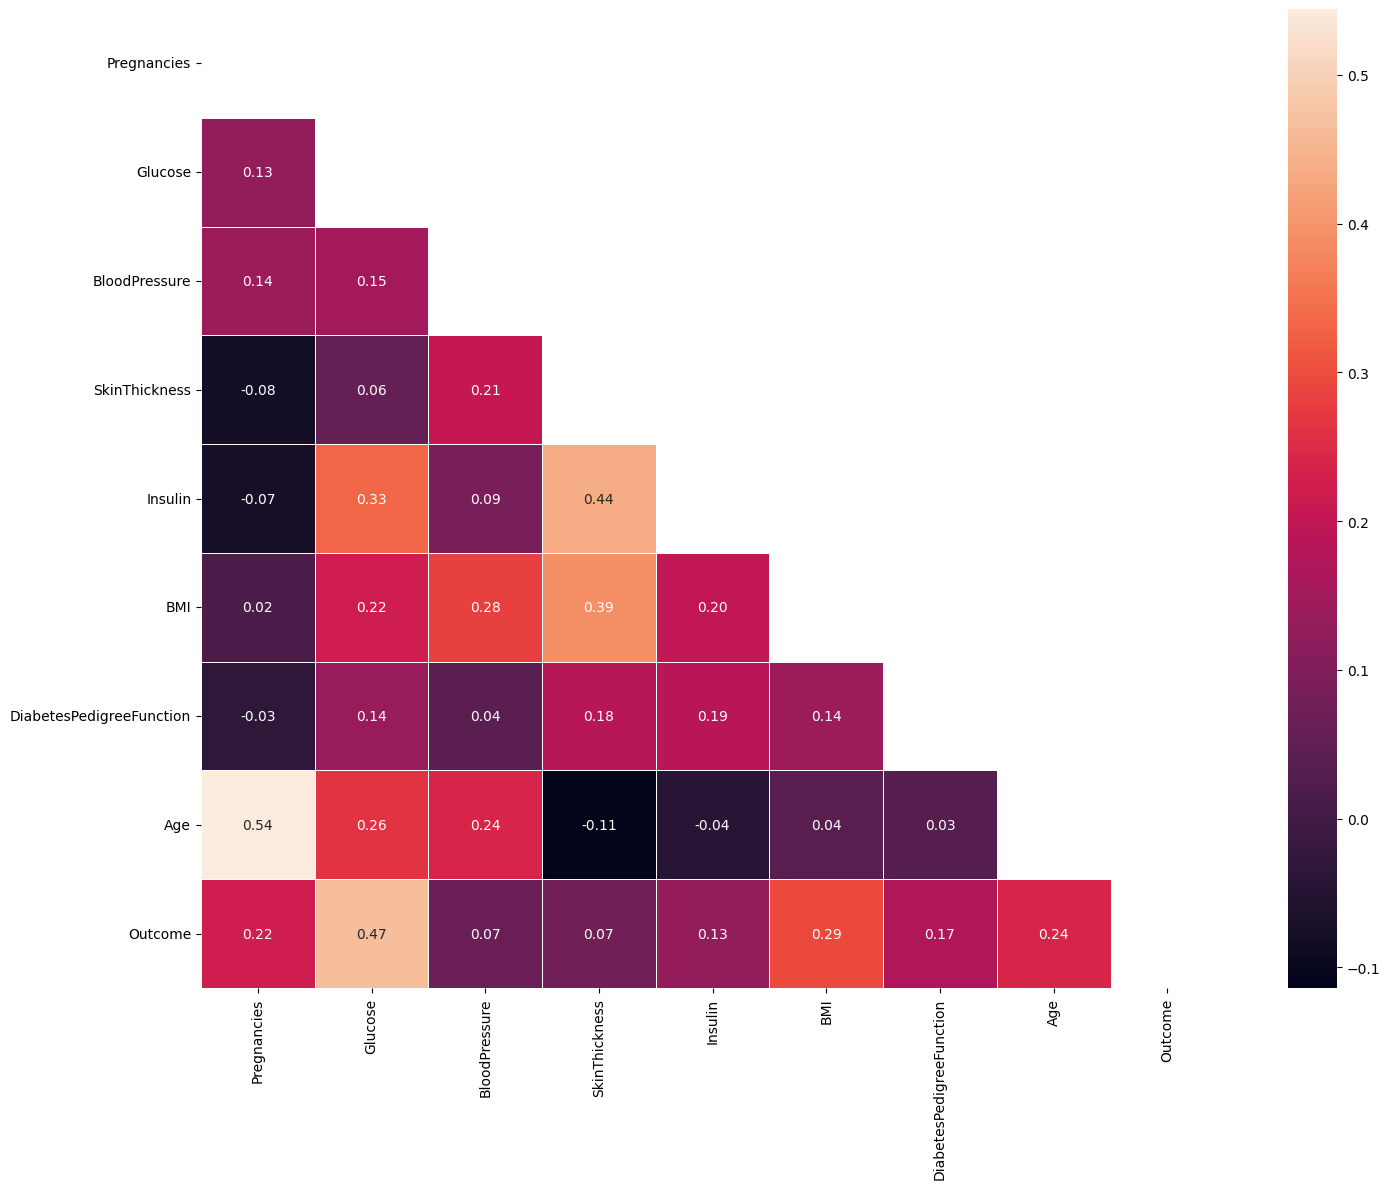

In [7]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.01]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

### Analisis de correlacion. 

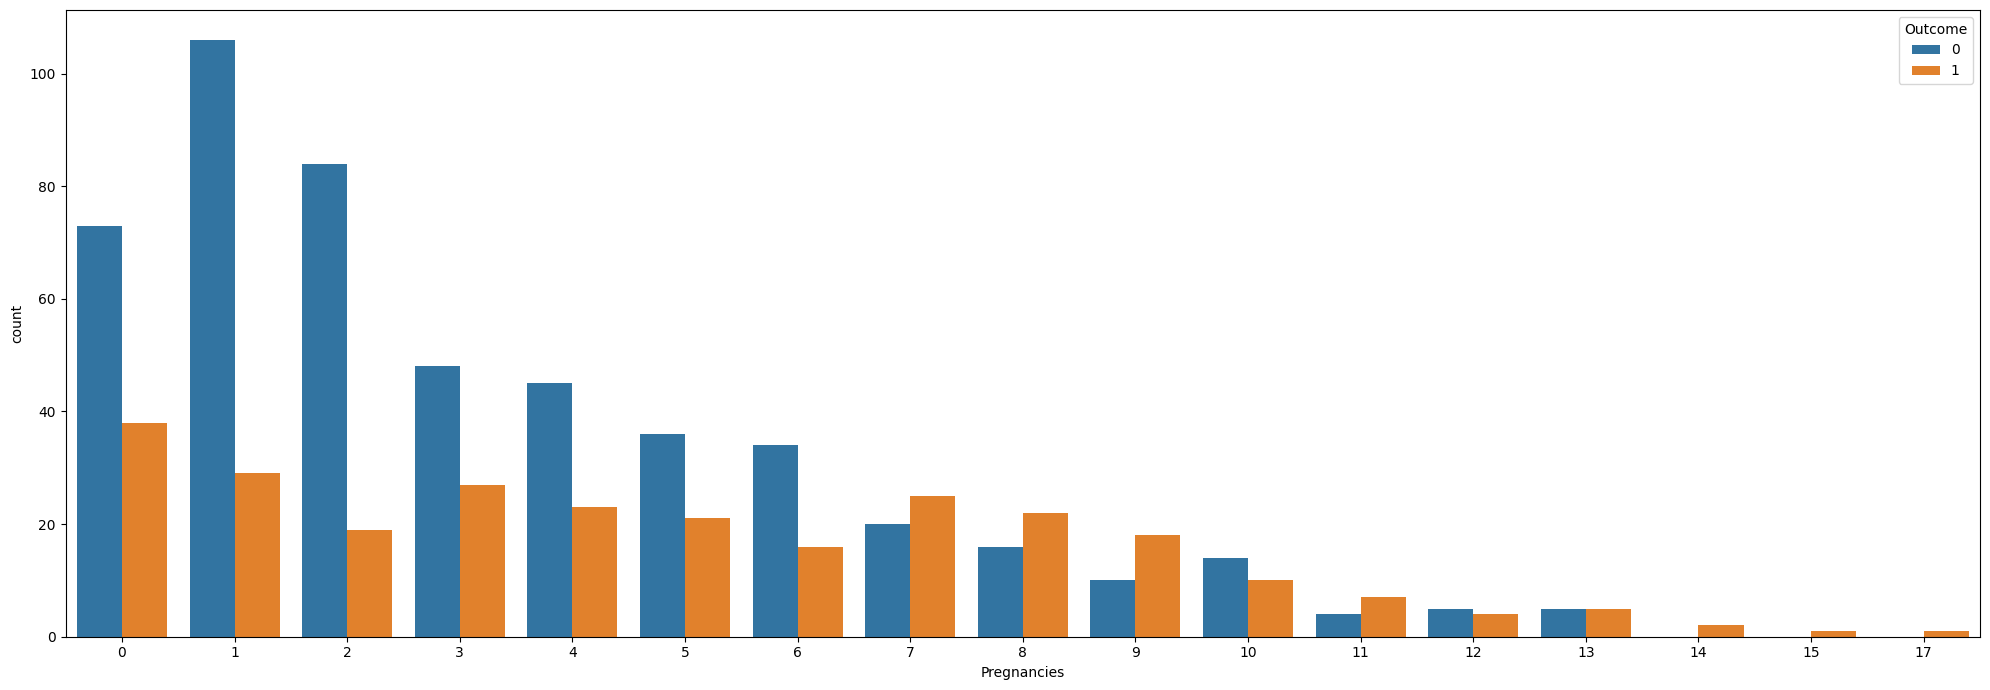

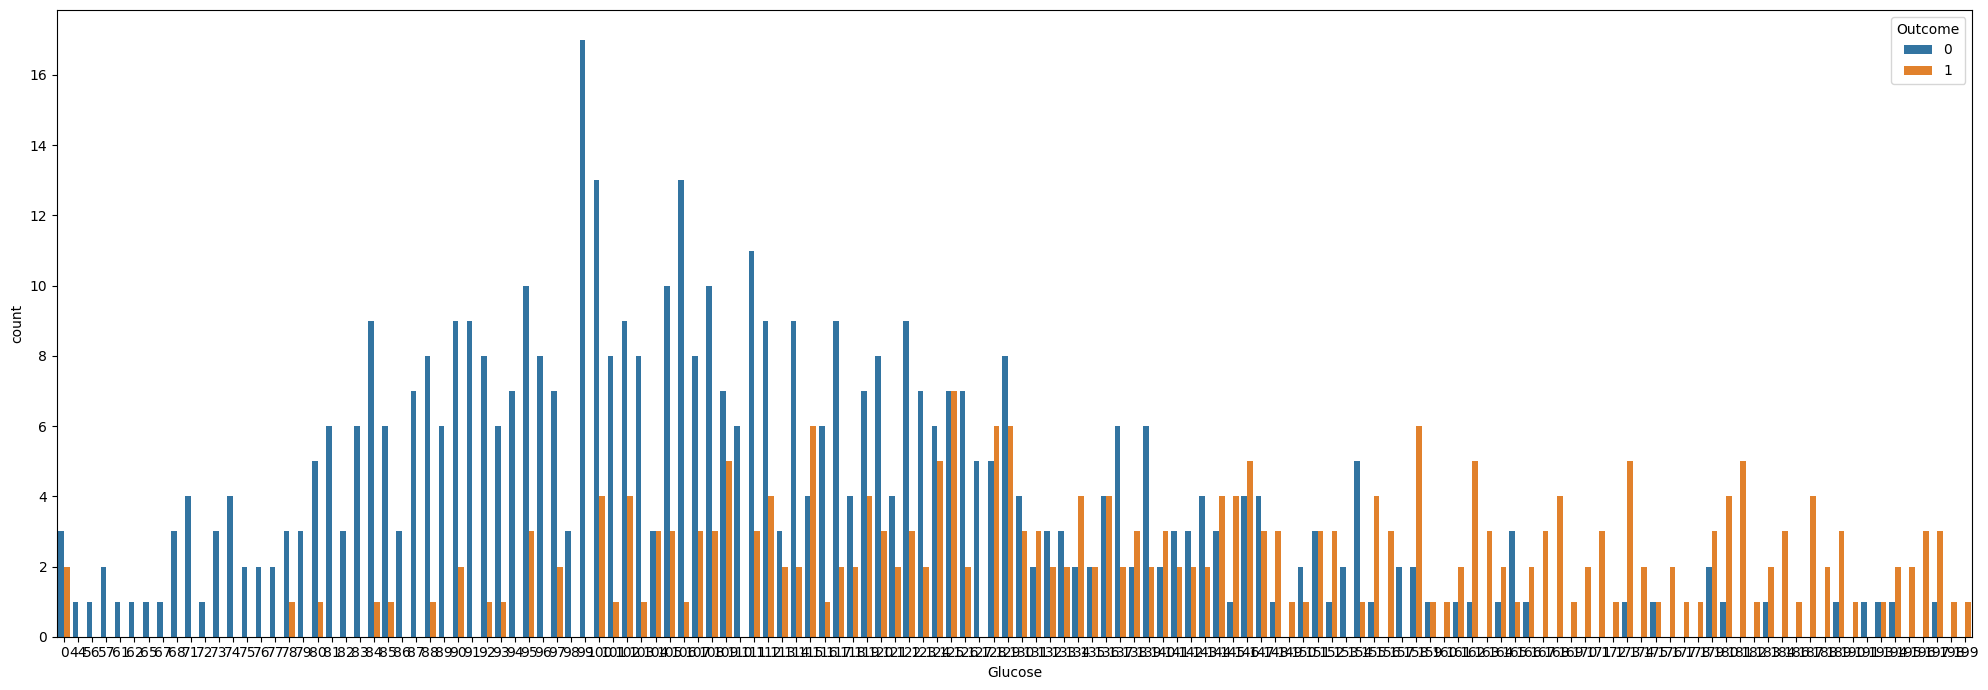

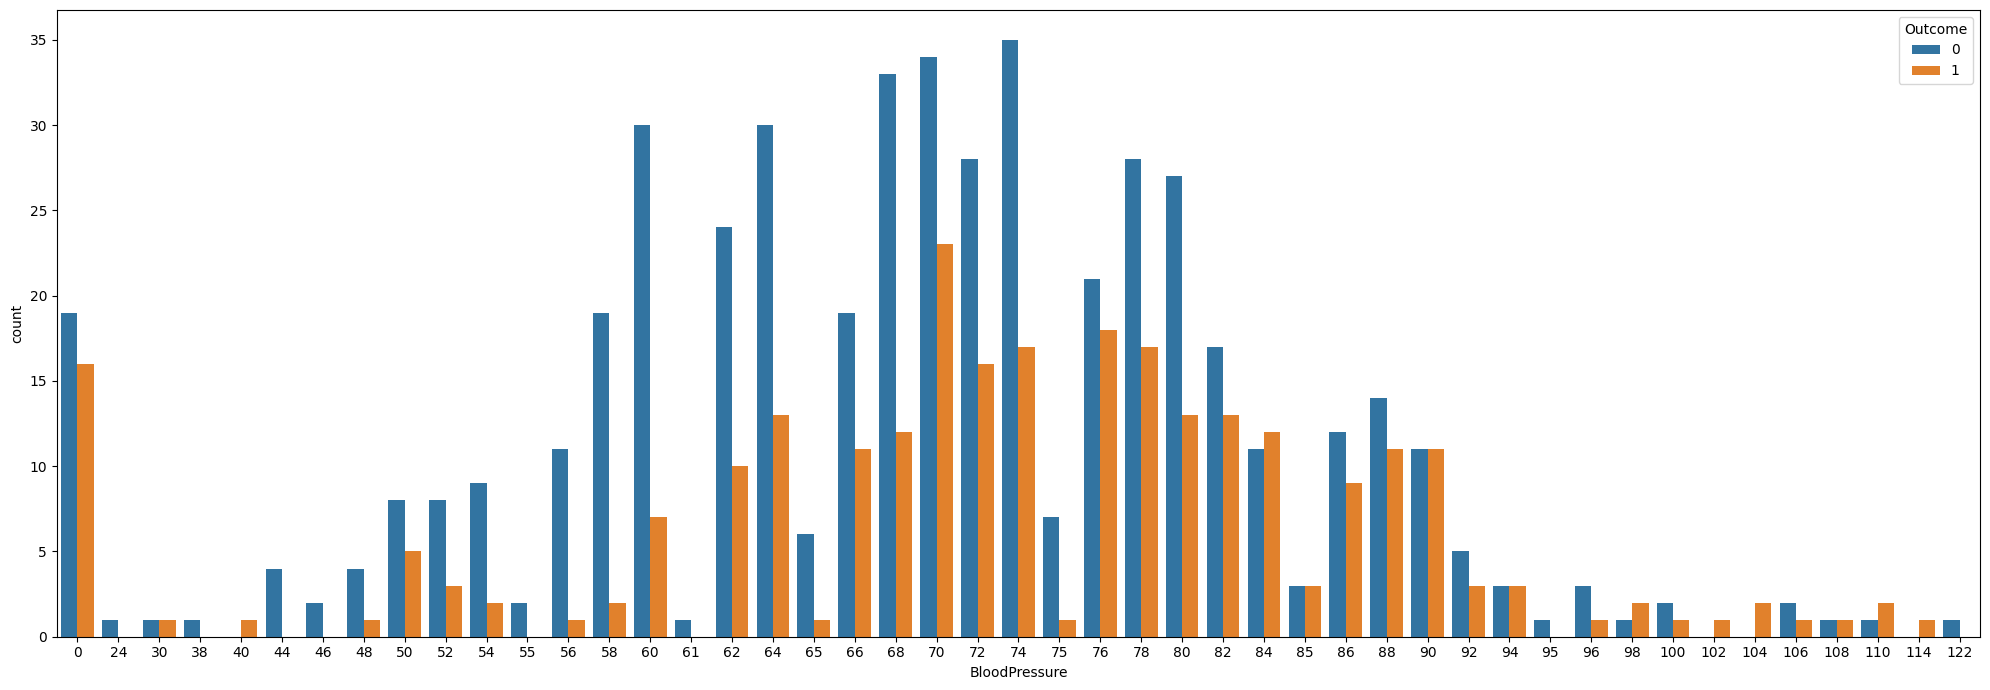

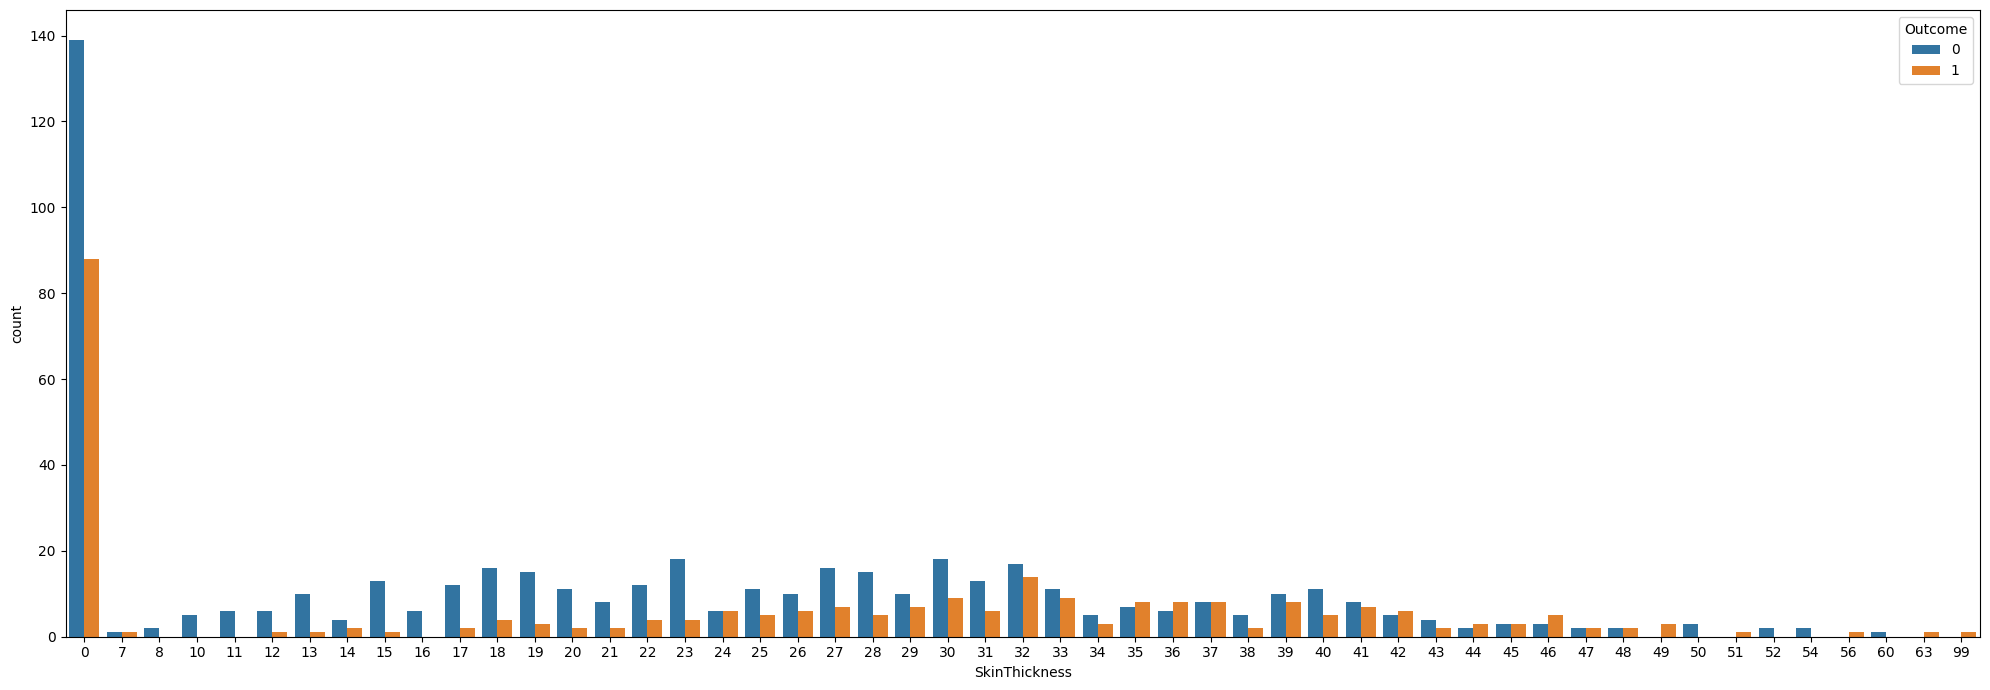

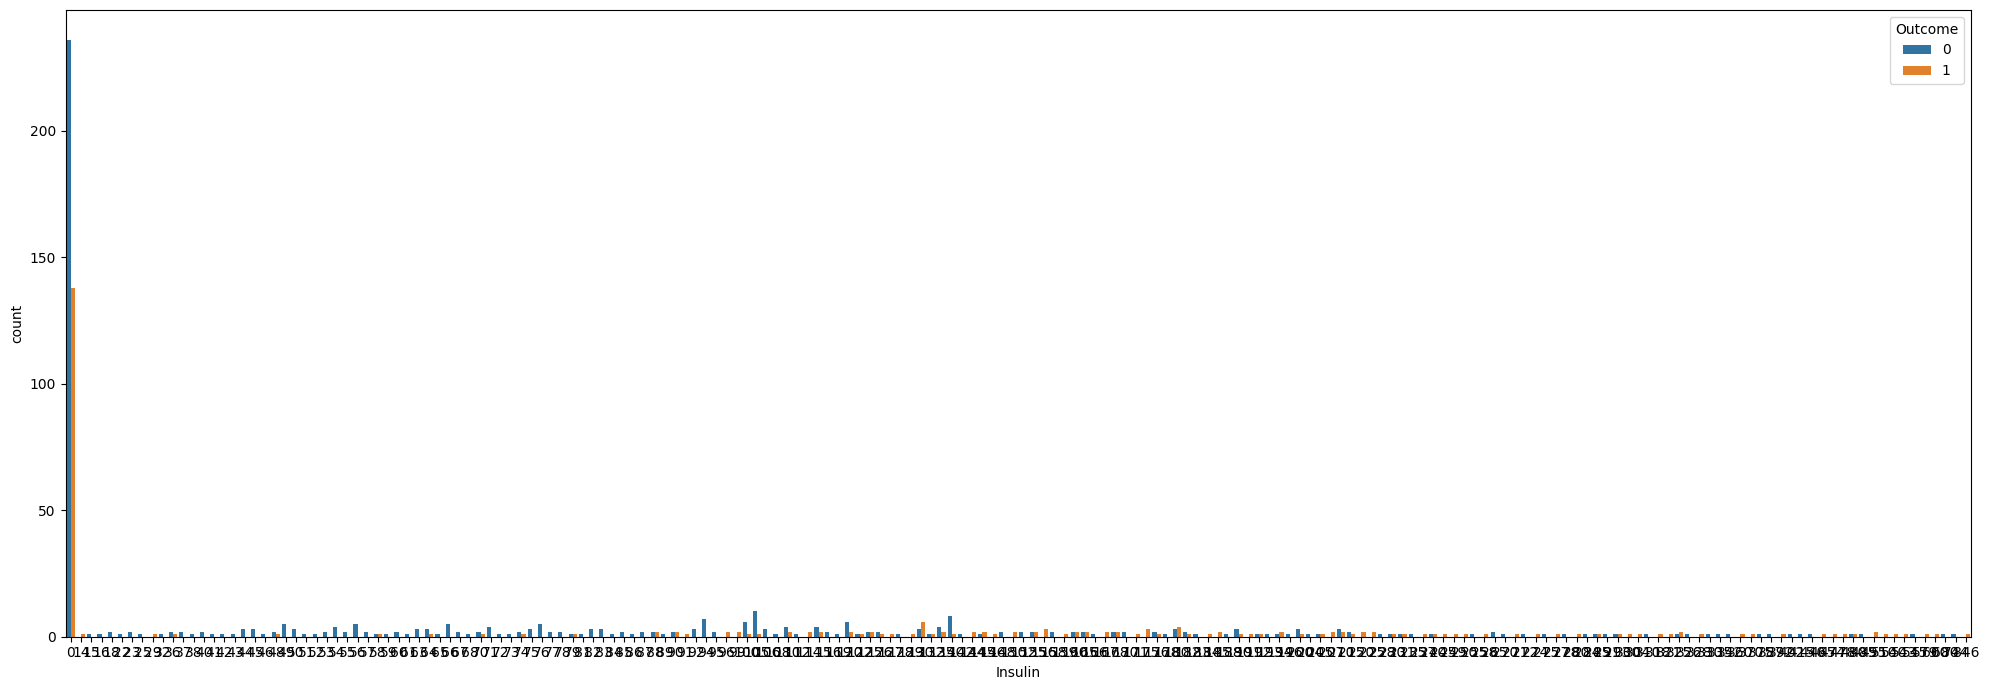

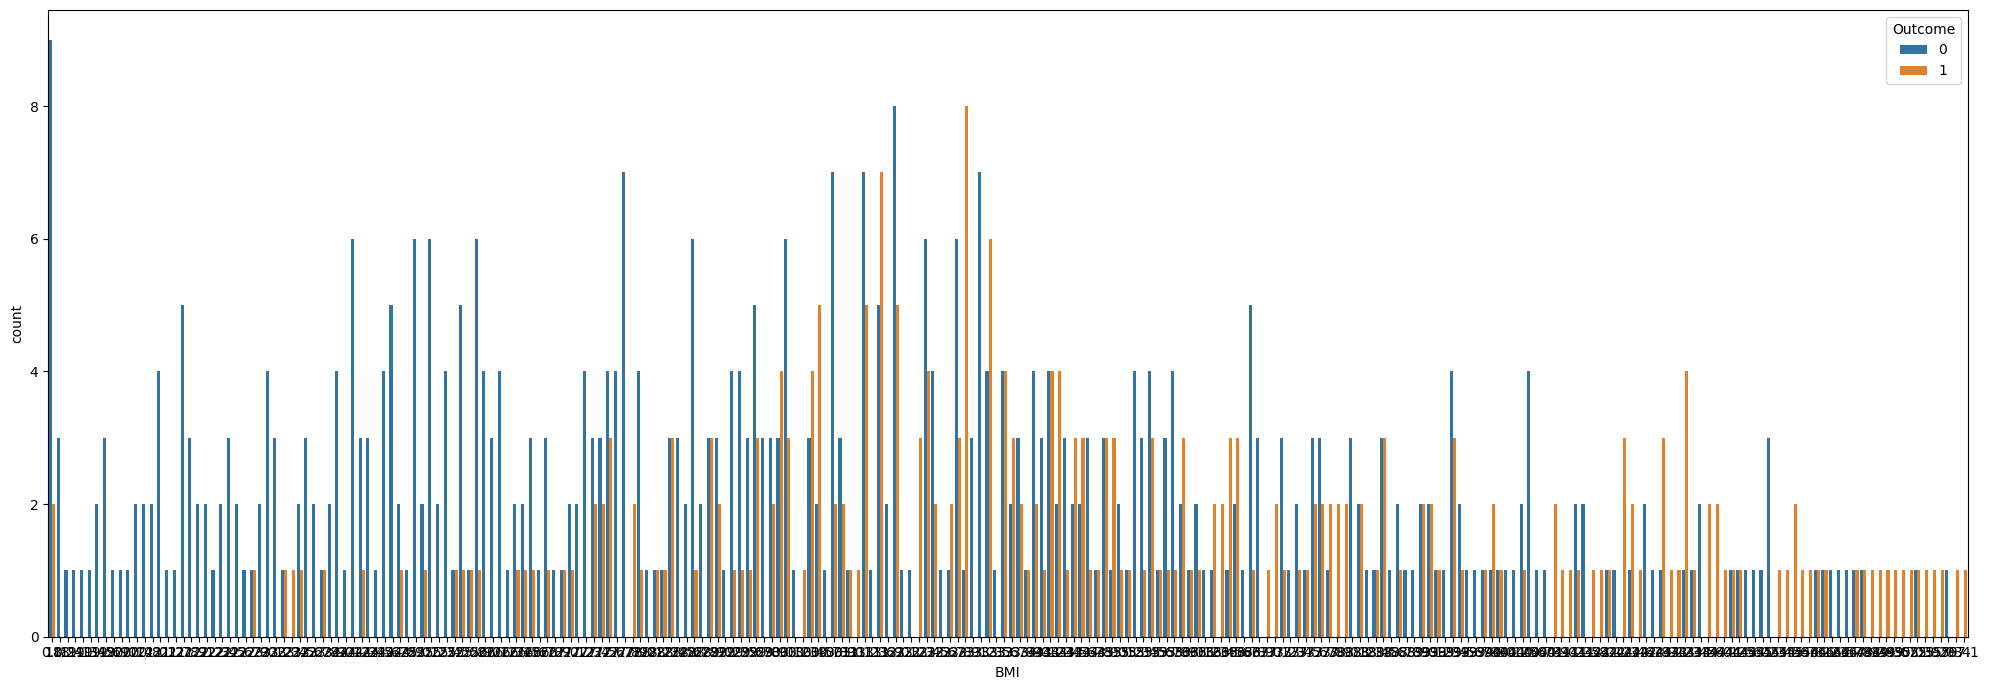

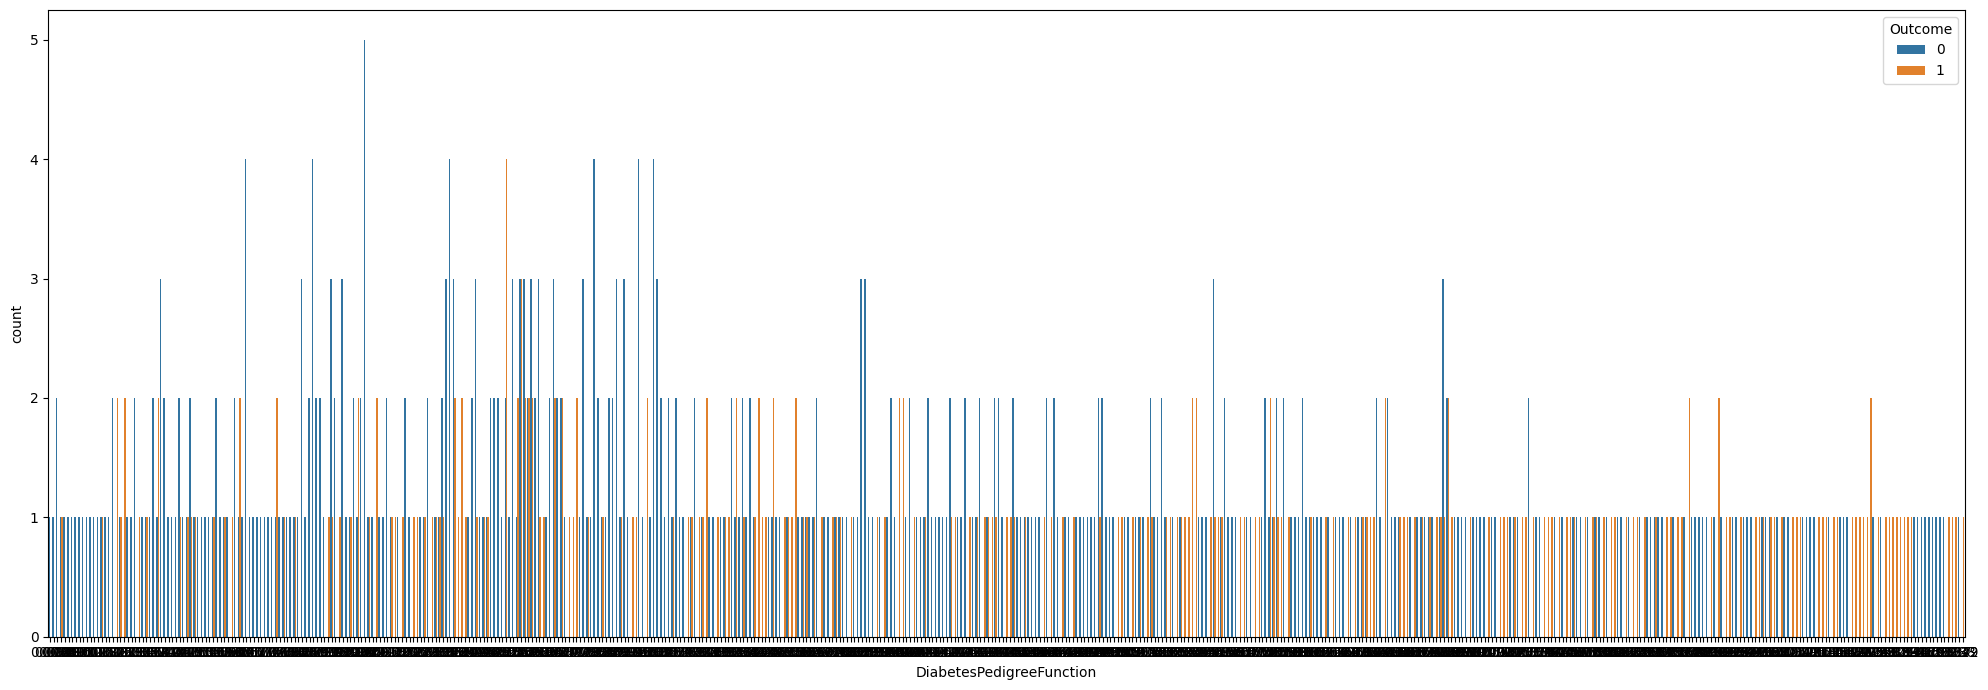

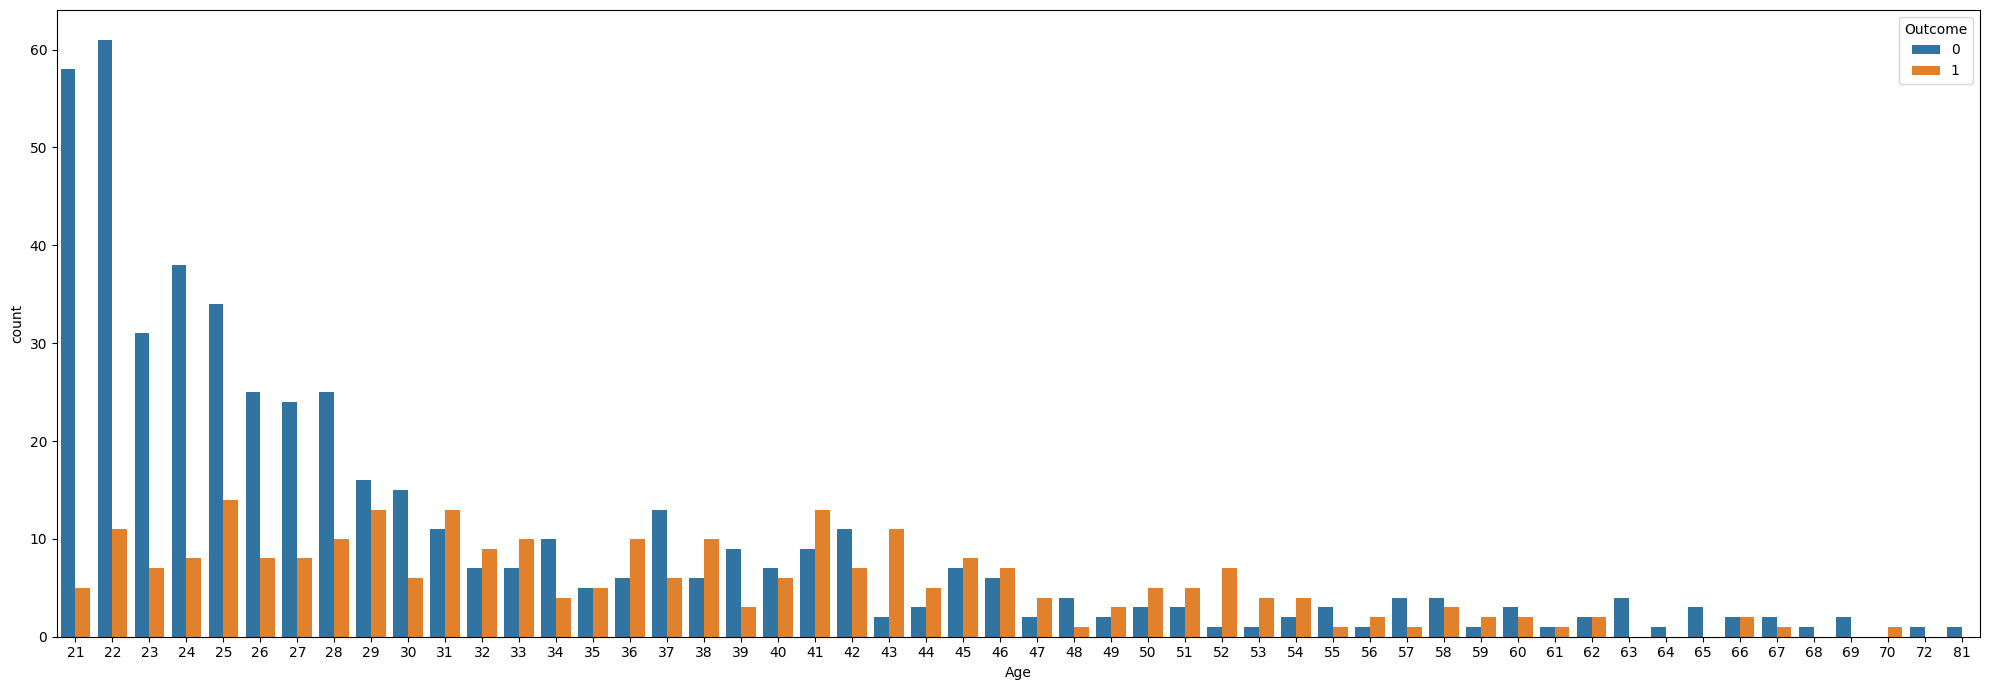

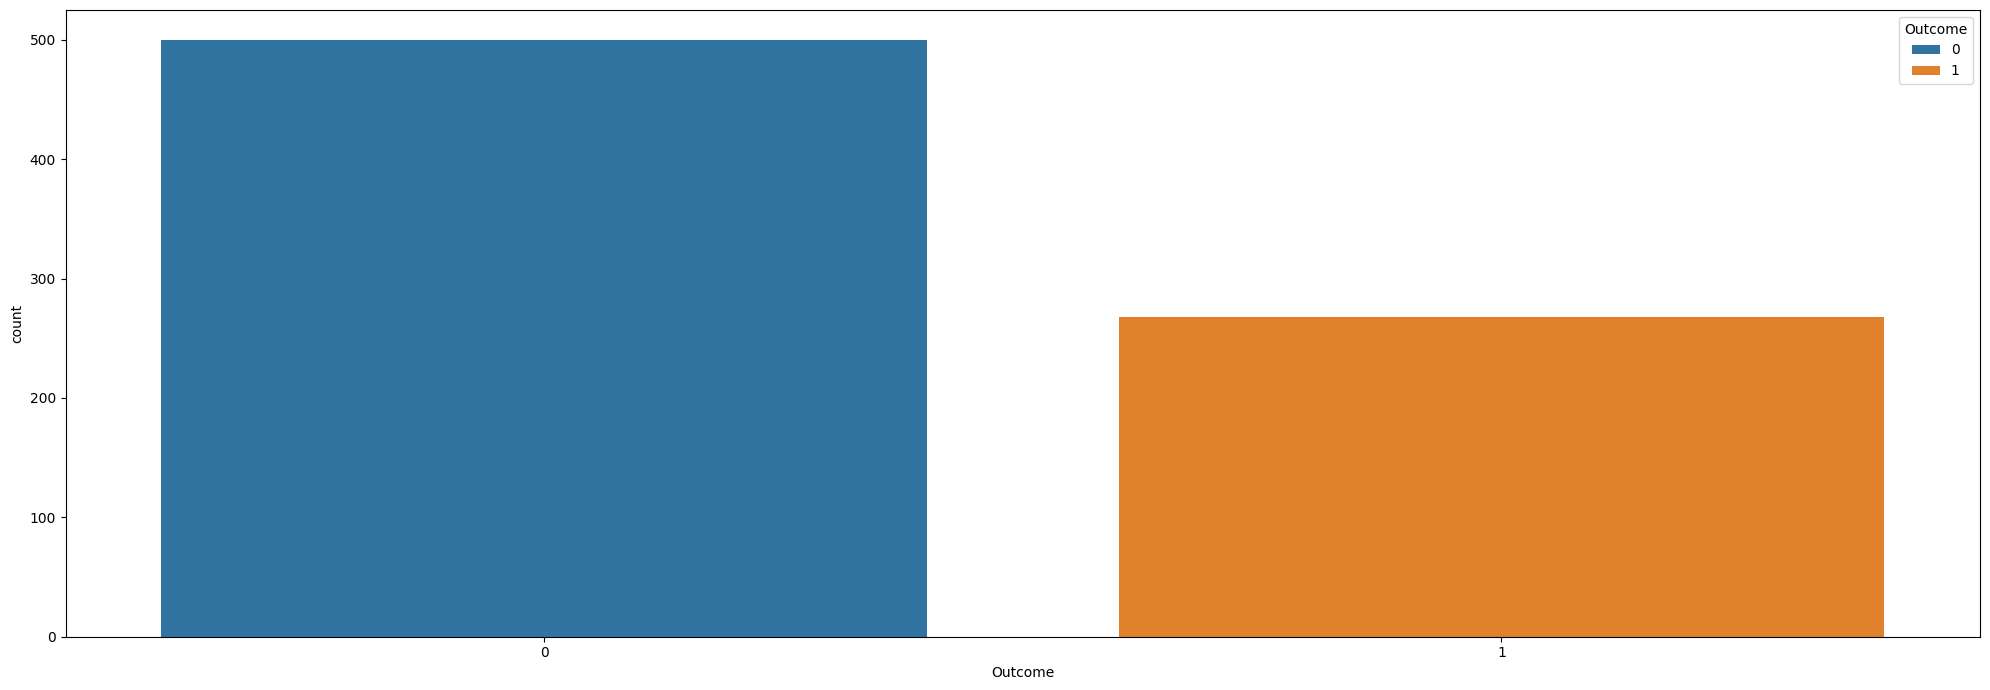

In [8]:
for columnas in df:
    fig, axis = plt.subplots(figsize=(20, 7))
    sns.countplot(data=df, x=columnas, hue='Outcome')
    plt.tight_layout()
    plt.show()

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,92,0,0,34.1,0.337,38
286,5,155,84,44,545,38.7,0.619,34
35,4,103,60,33,192,24.0,0.966,33
392,1,131,64,14,415,23.7,0.389,21
12,10,139,80,0,0,27.1,1.441,57


In [16]:
eda_diabetes = pd.DataFrame(df)

eda_diabetes.to_csv('../data/processed/eda_insulina.csv', index=False)
